In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [2]:
# Load the dataset
data = pd.read_csv("C:/Users/lkild/Downloads/spambase.csv")

In [3]:
#Dataset Information
print("Dataset Characterisation:")
print("Number of Rows: {data.shape[0]}")
print("Number of Columns: {data.shape[1]}")
print("Data Types and Missing Values:")
print(data.info())

Dataset Characterisation:
Number of Rows: {data.shape[0]}
Number of Columns: {data.shape[1]}
Data Types and Missing Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 59 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  4601 non-null   int64  
 1   word_freq_make              4601 non-null   float64
 2   word_freq_address           4601 non-null   float64
 3   word_freq_all               4595 non-null   float64
 4   word_freq_3d                4599 non-null   float64
 5   word_freq_our               4601 non-null   object 
 6   word_freq_over              4600 non-null   float64
 7   word_freq_remove            4601 non-null   float64
 8   word_freq_internet          4586 non-null   float64
 9   word_freq_order             4601 non-null   float64
 10  word_freq_mail              4601 non-null   float64
 11  word_freq_receive      

In [4]:
#Missing Values
missing_values = data.isnull().sum().sum()
print(f"Total Missing Values: {missing_values}")
#Punyakeerthi BL (2024). DataFrames : Handling Missing Values in Pandas - Punyakeerthi BL - Medium. [online] Medium. Available at: https://medium.com/@punya8147_26846/dataframes-handling-missing-values-in-pandas-11f7702afaf7.


Total Missing Values: 341


In [5]:
#Target Variable Distribution
target_column = 'is_spam'  
print("Target Variable Distribution:")
print(data[target_column].value_counts(normalize=True) * 100)

Target Variable Distribution:
is_spam
False    60.595523
True     39.404477
Name: proportion, dtype: float64


In [6]:
#Rename columns for better readability
data.columns = [col.strip().replace(' ', '_').lower() for col in data.columns]

In [7]:
#Remove unnecessary columns
#Assuming 'unnamed:_0' is an index column and not required
if 'unnamed:_0' in data.columns:
    data.drop(columns=['unnamed:_0'], inplace=True)

In [8]:
#Convert columns to numeric where possible
data = data.apply(pd.to_numeric, errors='coerce')

In [9]:
#Remove duplicates
data = data.drop_duplicates()

In [10]:
#Handle missing values (NaNs)
#Fill missing values with the median of each column
data = data.fillna(data.median(numeric_only=True))

In [11]:
#Summarize the cleaning process
cleaned_info = {
    "Shape after cleaning": data.shape,
    "Duplicate rows removed": data.duplicated().sum(),
    "Missing values after cleaning": data.isnull().sum().sum()}

In [12]:
#Output the summary of the cleaning process
print("Data Cleaning Summary:")
for key, value in cleaned_info.items():
    print(f"{key}: {value}")

#Display first few rows of cleaned data
data.head()

Data Cleaning Summary:
Shape after cleaning: (4218, 58)
Duplicate rows removed: 8
Missing values after cleaning: 0


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,True
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,True
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,True
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,True
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,True


In [13]:
#Create a copy of the data for cleaning
data_cleaned = data.copy()

#Rename columns using a dictionary comprehension
data_cleaned.columns = data_cleaned.columns.str.replace("_", " ").str.title()

#Replace specific words for better clarity
data_cleaned.columns = data_cleaned.columns.str.replace("Word Freq", "Word Frequency")
data_cleaned.columns = data_cleaned.columns.str.replace("Char Freq", "Character Frequency")
data_cleaned.columns = data_cleaned.columns.str.replace("Is Spam", "Spam")

#Verify the renamed columns
print("Renamed Columns:")
print(data_cleaned.columns)

Renamed Columns:
Index(['Word Frequency Make', 'Word Frequency Address', 'Word Frequency All',
       'Word Frequency 3D', 'Word Frequency Our', 'Word Frequency Over',
       'Word Frequency Remove', 'Word Frequency Internet',
       'Word Frequency Order', 'Word Frequency Mail', 'Word Frequency Receive',
       'Word Frequency Will', 'Word Frequency People', 'Word Frequency Report',
       'Word Frequency Addresses', 'Word Frequency Free',
       'Word Frequency Business', 'Word Frequency Email', 'Word Frequency You',
       'Word Frequency Credit', 'Word Frequency Your', 'Word Frequency Font',
       'Word Frequency 000', 'Word Frequency Money', 'Word Frequency Hp',
       'Word Frequency Hpl', 'Word Frequency George', 'Word Frequency 650',
       'Word Frequency Lab', 'Word Frequency Labs', 'Word Frequency Telnet',
       'Word Frequency 857', 'Word Frequency Data', 'Word Frequency 415',
       'Word Frequency 85', 'Word Frequency Technology', 'Word Frequency 1999',
       'Word Fre

In [14]:
#Check for any remaining NaN values in the cleaned dataset
missing_values_total = data_cleaned.isnull().sum().sum()

if missing_values_total == 0:
    print("All NaN values have been successfully cleaned!")
else:
    print(f"There are still {missing_values_total} NaN values remaining in the dataset.")

All NaN values have been successfully cleaned!


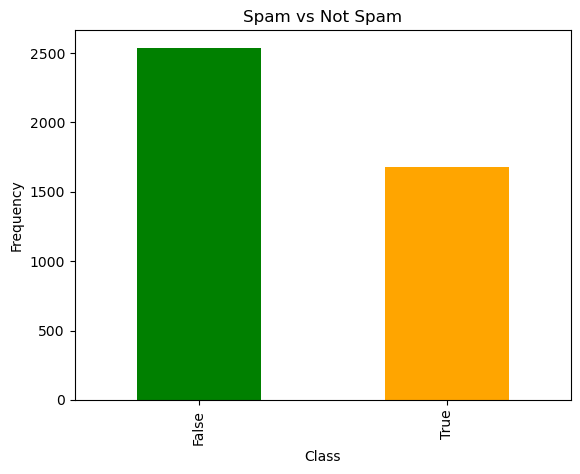

In [15]:
# Target Variable Distribution
data_cleaned['Spam'].value_counts().plot(kind='bar', color=['green', 'orange'])
plt.title("Spam vs Not Spam")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()


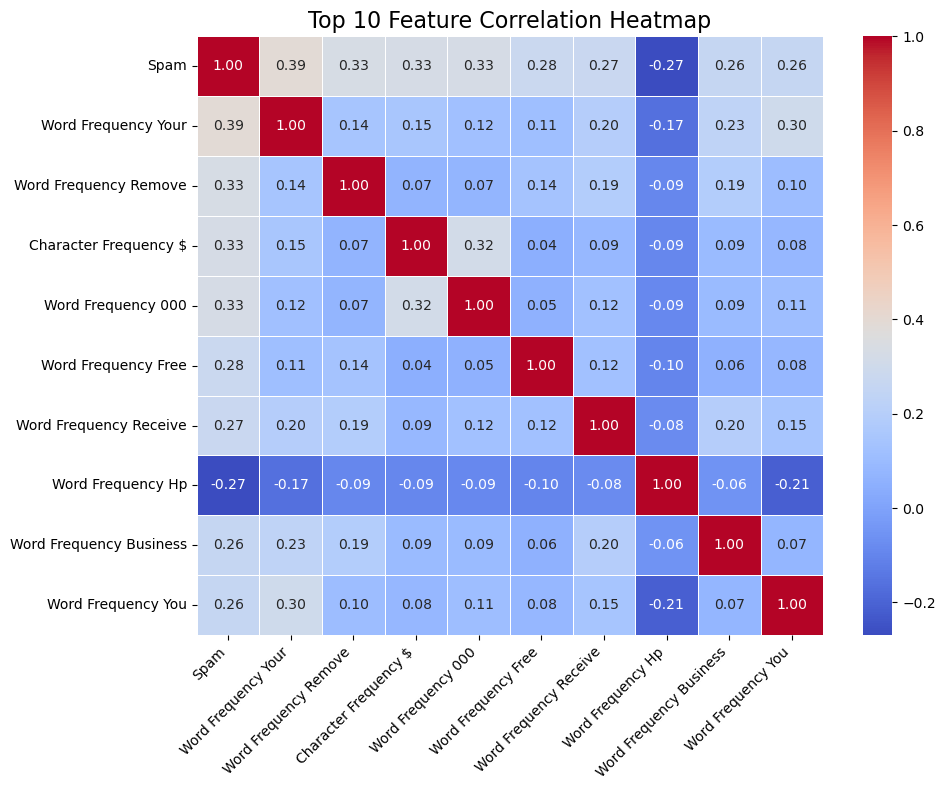

In [16]:
# Correlation Heatmap
correlation_matrix=data_cleaned.corr()

top_features=correlation_matrix['Spam'].abs().sort_values(ascending=False).head(10).index
top_correlation_matrix=data_cleaned[top_features].corr()

plt.figure(figsize=(10,8))
sns.heatmap(top_correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Top 10 Feature Correlation Heatmap", fontsize=16)
plt.xticks(fontsize=10, rotation=45, ha="right")
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()
#Mlcourse.ai. (2023). Visual data analysis in Python. Part 1. Visualization: from Simple Distributions to Dimensionality Reduction — mlcourse.ai. [online] Available at: https://mlcourse.ai/book/topic02/topic02_visual_data_analysis.html [Accessed 21 Dec. 2024].


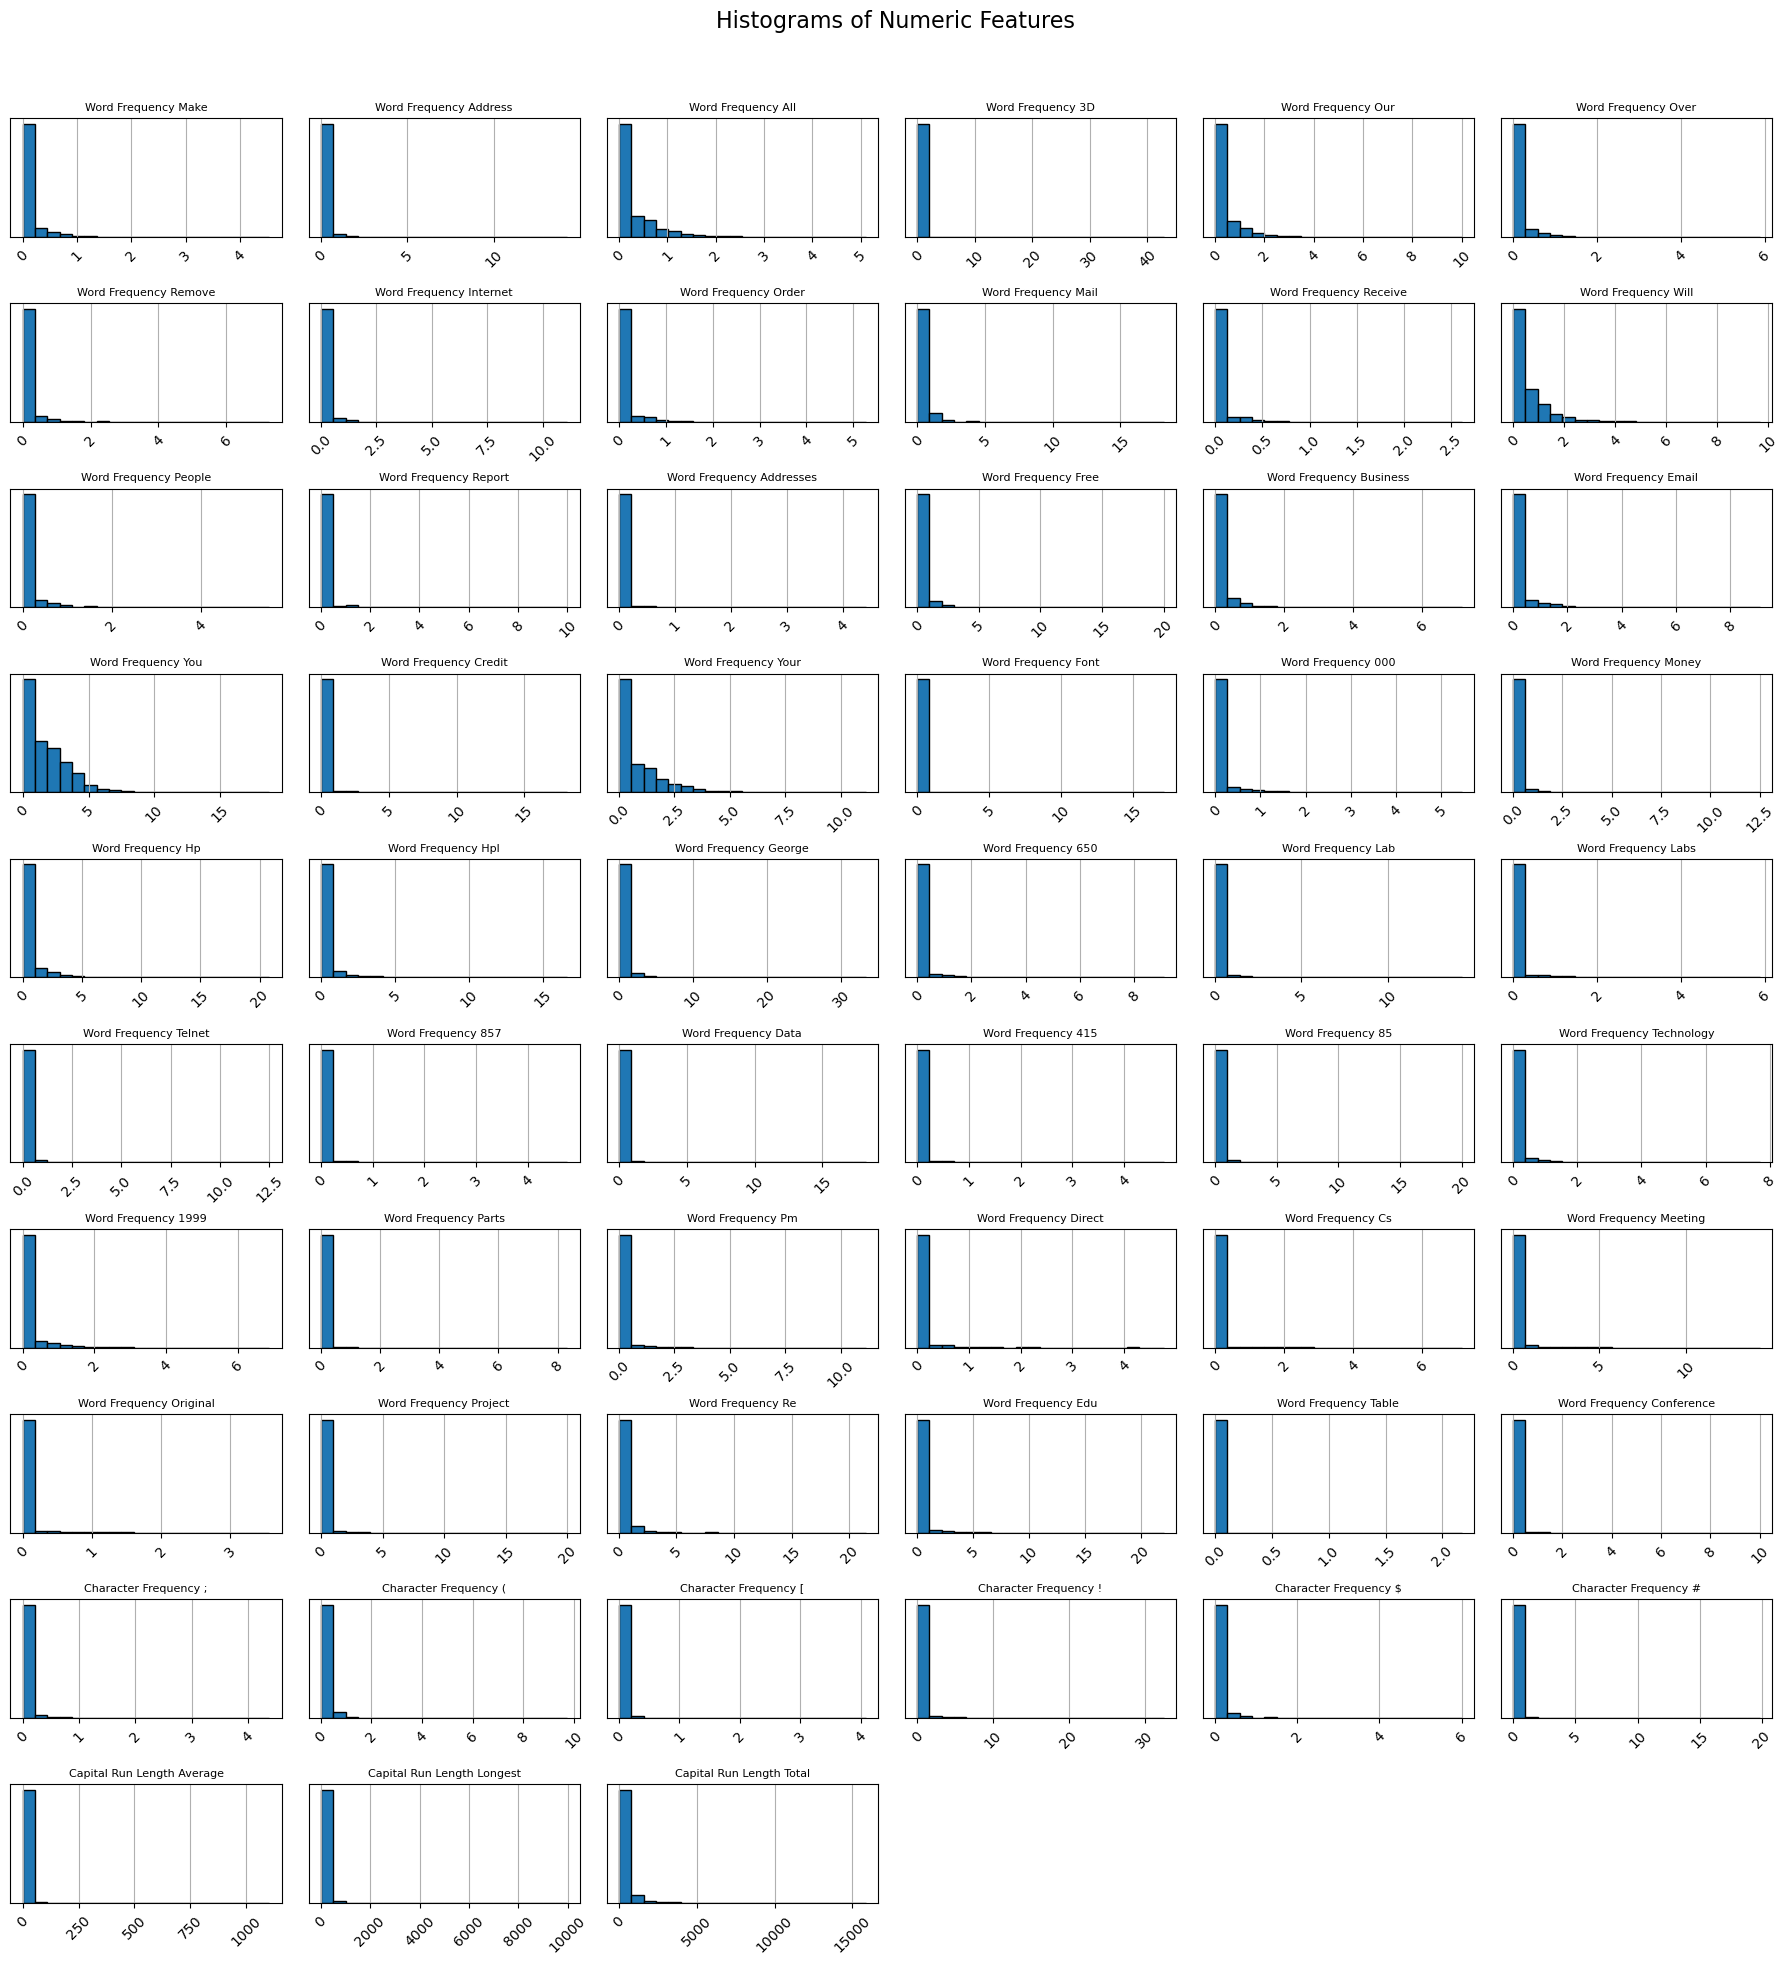

In [17]:
#Create histogram
fig, axes = plt.subplots(nrows=10, ncols=6, figsize=(18, 20))  
axes = axes.flatten()  

#Loop through columns and create histograms
for i, col in enumerate(data_cleaned.columns):
    if data_cleaned[col].dtype in ['float64', 'int64']: 
        data_cleaned[col].hist(ax=axes[i], bins=20, edgecolor='black')
        axes[i].set_title(col, fontsize=8)  
        axes[i].tick_params(axis='x', rotation=45)  
        axes[i].set_yticks([])  
    else:
        axes[i].axis('off')  

#Remove unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Histograms of Numeric Features", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  
plt.show()

In [18]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#Standardize the numeric data
scaler = StandardScaler()
numeric_data = data_cleaned.select_dtypes(include='number')
scaled_data = scaler.fit_transform(numeric_data)

# Select numeric columns for standardization
numeric_columns = data_cleaned.select_dtypes(include='number').columns

# Initialize the scaler
scaler = StandardScaler()

# Standardize the numeric data
data_cleaned[numeric_columns] = scaler.fit_transform(data_cleaned[numeric_columns])

# Verify the standardization
print(data_cleaned[numeric_columns].describe())

       Word Frequency Make  Word Frequency Address  Word Frequency All  \
count         4.218000e+03            4.218000e+03        4.218000e+03   
mean          4.042917e-17            2.695278e-17        2.695278e-17   
std           1.000119e+00            1.000119e+00        1.000119e+00   
min          -3.475516e-01           -2.477777e-01       -5.646230e-01   
25%          -3.475516e-01           -2.477777e-01       -5.646230e-01   
50%          -3.475516e-01           -2.477777e-01       -5.646230e-01   
75%          -3.475516e-01           -2.477777e-01        2.892333e-01   
max           1.479997e+01            3.121972e+01        9.332347e+00   

       Word Frequency 3D  Word Frequency Our  Word Frequency Over  \
count       4.218000e+03        4.218000e+03         4.218000e+03   
mean        6.738196e-18        2.695278e-17        -5.390557e-17   
std         1.000119e+00        1.000119e+00         1.000119e+00   
min        -4.660001e-02       -4.726103e-01        -3.49

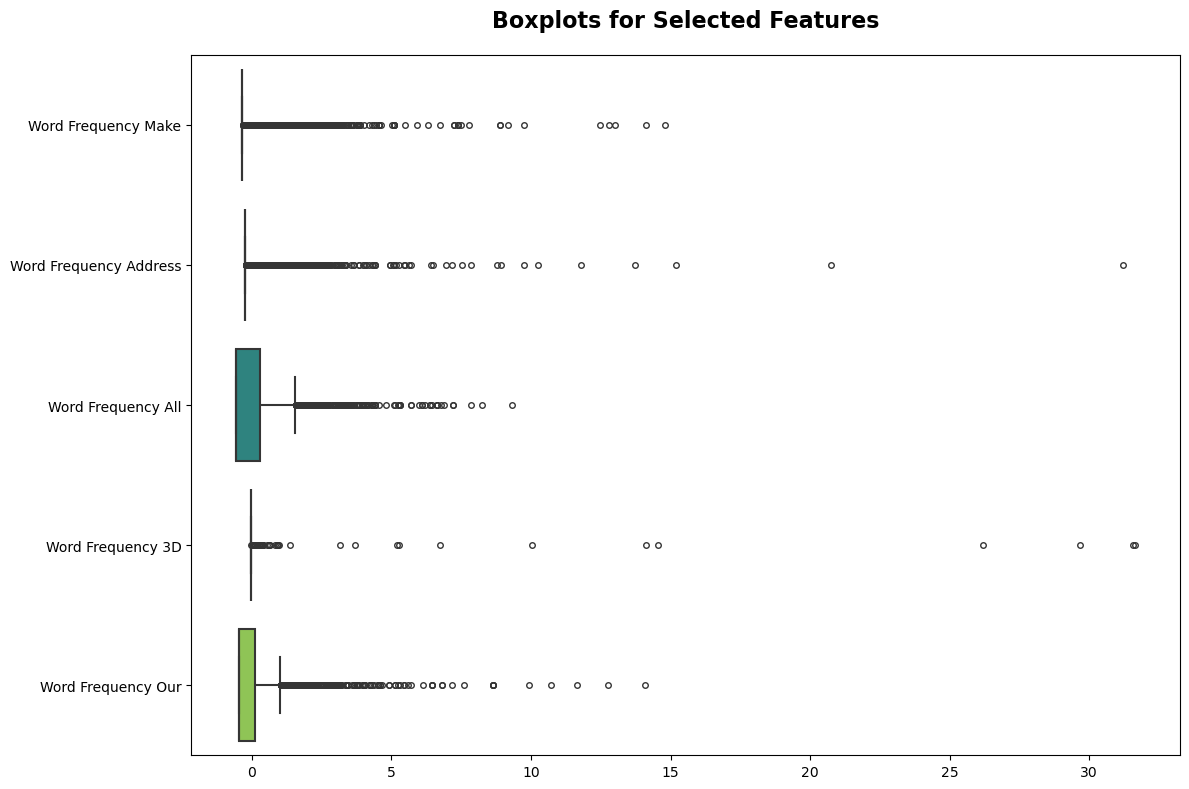

In [21]:
# Boxplots for Selected Features
selected_columns = data_cleaned.select_dtypes(include='number').columns[:5]  # Example: First 5 columns
plt.figure(figsize=(12, 8))
sns.boxplot(data=data_cleaned[selected_columns], orient="h", palette="viridis", linewidth=1.5, fliersize=4, whis=1.5)
plt.title("Boxplots for Selected Features",fontsize=16,weight="bold", pad=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

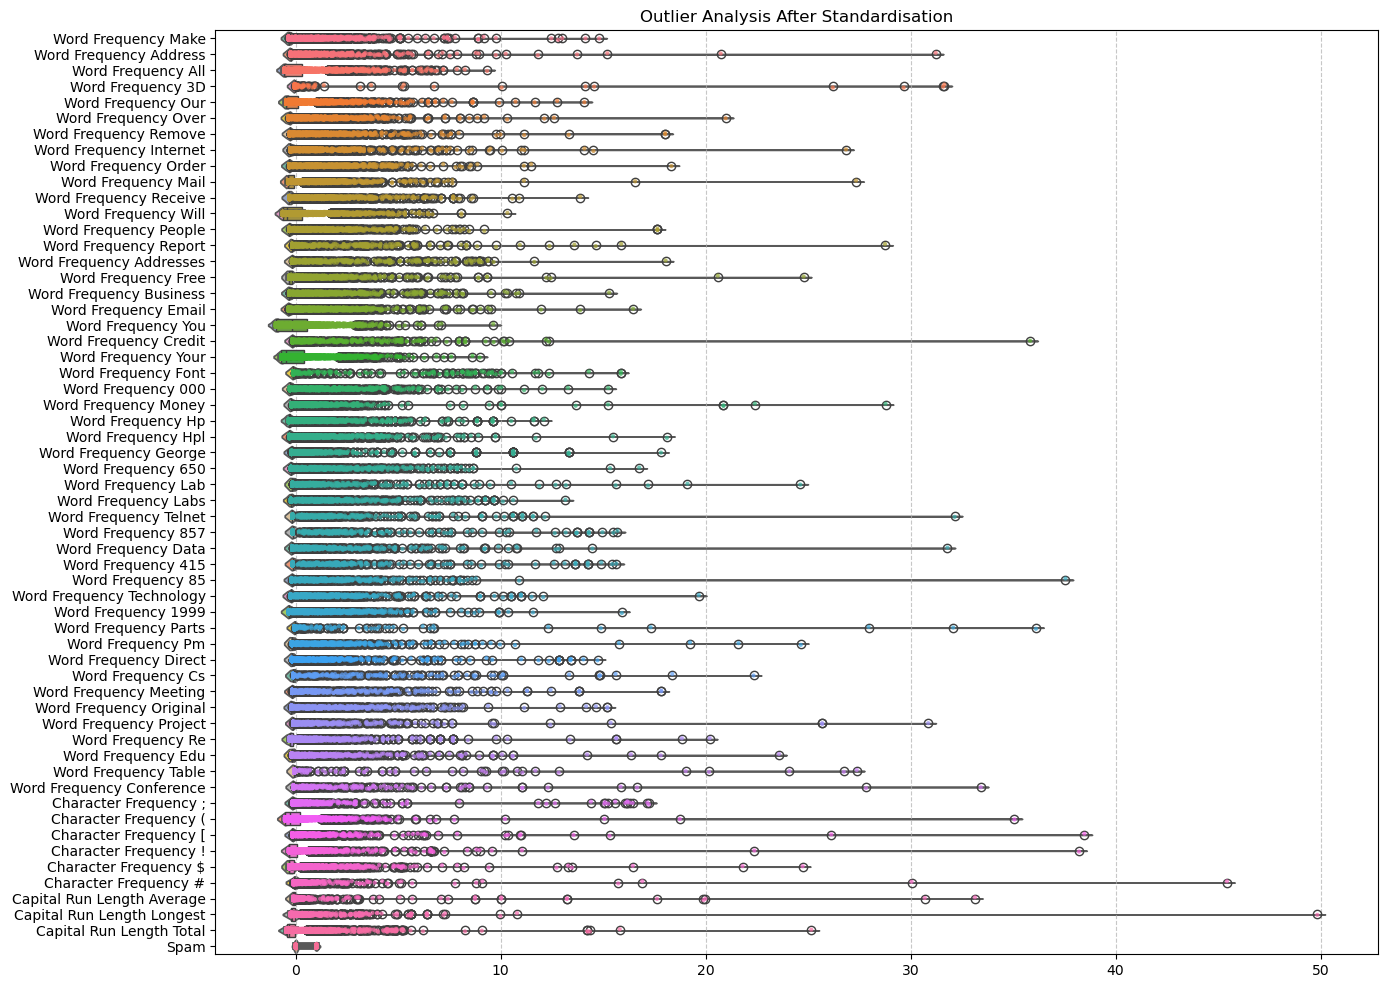

In [23]:
#Boxplot to identify outliers in standardised data
plt.figure(figsize=(15, 12))
sns.stripplot(data=data_cleaned, jitter=True, size=3, alpha=0.7, orient='h')
sns.boxplot(data=pd.DataFrame(scaled_data, columns=numeric_columns), orient='h')
plt.title("Outlier Analysis After Standardisation")
plt.yticks(rotation=0)
sampled_data=data.sample(1000)
sns.violinplot(data=data_cleaned, orient='h', palette="Set2")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [24]:
#Apply PCA
pca = PCA()
pca.fit(scaled_data)

PCA()

In [25]:
#Determine components to retain 99.5% variance
cumulative_variance = pca.explained_variance_ratio_.cumsum()
components_needed = (cumulative_variance >= 0.995).argmax() + 1
print(f"Number of components to retain 99.5% variance: {components_needed}")

Number of components to retain 99.5% variance: 55


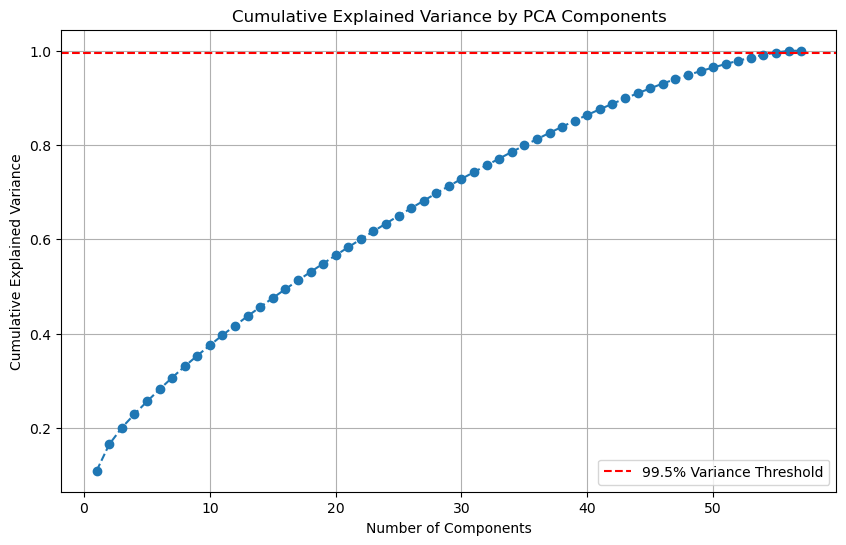

In [26]:
#Plot Cumulative Explained Variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.axhline(y=0.995, color='r', linestyle='--', label='99.5% Variance Threshold')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.legend()
plt.grid()
plt.show()

In [27]:
#Reduce Dataset Using PCA
pca_reduced = PCA(n_components=components_needed)
reduced_data = pca_reduced.fit_transform(scaled_data)

print(f"Shape of reduced dataset: {reduced_data.shape}")

Shape of reduced dataset: (4218, 55)


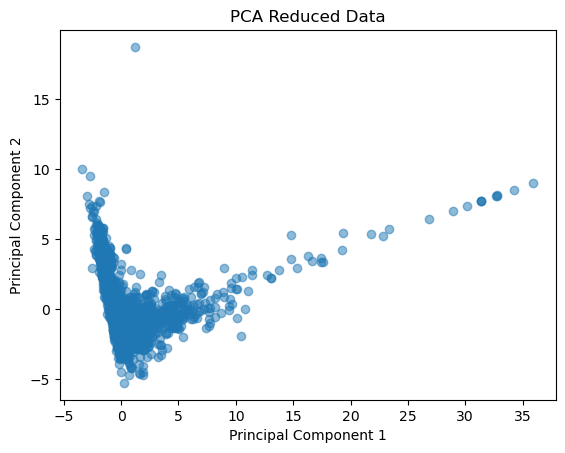

In [28]:
# Visualize the reduced data
import matplotlib.pyplot as plt
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], alpha=0.5)
plt.title("PCA Reduced Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()
#GeeksforGeeks (2023). Effect of Transforming the Targets in Regression Model. [online] GeeksforGeeks. Available at: https://www.geeksforgeeks.org/effect-of-transforming-the-targets-in-regression-model/ [Accessed 21 Dec. 2024].

In [29]:
#Demonstrate sparsity in high-dimensional spaces
dims = [1, 5, 10, 20, 50]
num_points = 1000
avg_nearest_neighbor_distances = []

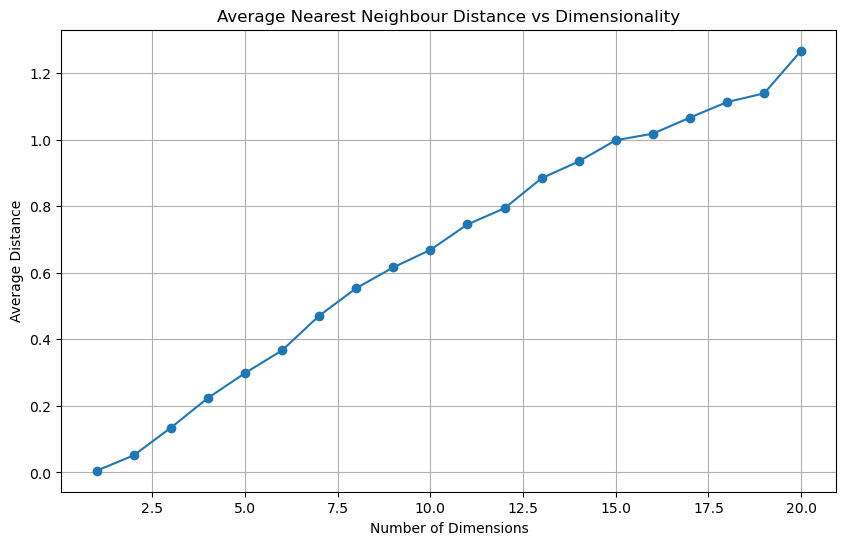

In [54]:

# Define dimensions
dims = list(range(1, 21))

# Initialize a list to store average nearest neighbor distances
avg_nearest_neighbour_distances = []

for dim in dims:
    # Generate random points in the given dimensional space
    points = np.random.random((100, dim))
    
    # Compute pairwise distances
    distances = np.sqrt(((points[:, None] - points) ** 2).sum(axis=2))
    
    # Ignore self-distances by setting the diagonal to infinity
    np.fill_diagonal(distances, np.inf)
    
    # Find the nearest neighbor distance for each point
    nearest_neighbour_distances = np.min(distances, axis=1)
    
    # Compute the average of these distances
    avg_nearest_neighbour_distances.append(np.mean(nearest_neighbour_distances))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(dims, avg_nearest_neighbour_distances, marker='o', linestyle='-')
plt.title("Average Nearest Neighbour Distance vs Dimensionality")
plt.xlabel("Number of Dimensions")
plt.ylabel("Average Distance")
plt.grid()
plt.show()
#GeeksforGeeks. (2024). K-Nearest Neighbors and Curse of Dimensionality. [online] Available at: https://www.geeksforgeeks.org/k-nearest-neighbors-and-curse-of-dimensionality/.

In [56]:
# Analyse feature contributions in PCA
pca_loadings = pd.DataFrame(pca.components_, columns=numeric_data.columns)
pca_loadings.index = [f'PC{i+1}' for i in range(pca.n_components_)]

print("PCA LOADINGS COLUMNS:")
print(pca_loadings)
print(pca_loadings.head())

#Chouinard, J.-C. (2023). What are PCA Loadings (with Python Example) - JC Chouinard. [online] JC Chouinard. Available at: https://www.jcchouinard.com/pca-loadings/.

PCA LOADINGS COLUMNS:
      Word Frequency Make  Word Frequency Address  Word Frequency All  \
PC1             -0.046848               -0.020560           -0.052108   
PC2              0.144621                0.112051            0.146188   
PC3             -0.030250               -0.021303           -0.030503   
PC4             -0.043936               -0.134831            0.022575   
PC5              0.026058               -0.019623            0.082010   
PC6             -0.138889                0.106701           -0.121686   
PC7              0.025282               -0.093452           -0.003948   
PC8              0.129325                0.196662            0.098513   
PC9             -0.099135                0.323889            0.203640   
PC10            -0.297072               -0.096527            0.038420   
PC11             0.170831                0.066503            0.116660   
PC12            -0.105322                0.384460           -0.284792   
PC13             0.238199    

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

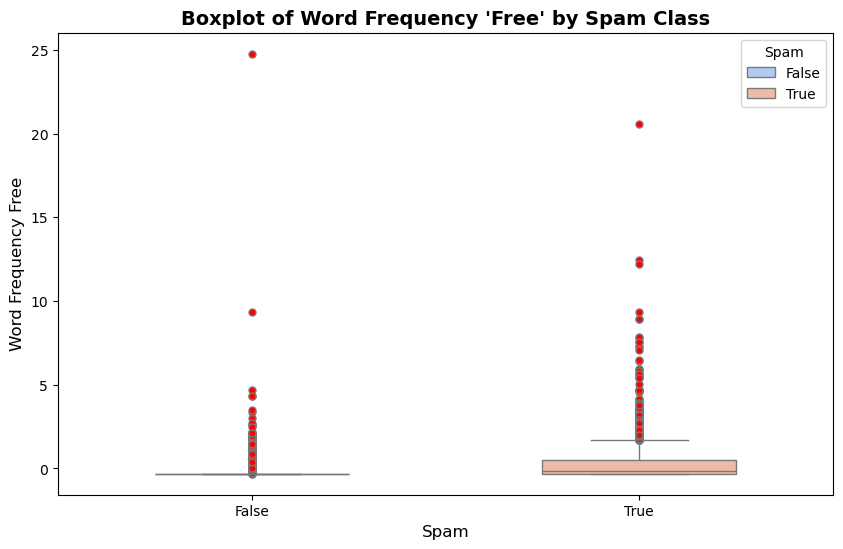

In [58]:
#Pairwise comparison of selected features
selected_features = ['Word Frequency Free', 'Character Frequency !', 'Capital Run Length Total']
for feature in selected_features:
    plt.figure(figsize=(10, 6))
sns.boxplot(
    x="Spam",
    y="Word Frequency Free",
    data=data_cleaned,
    hue="Spam",
    palette="coolwarm",
    width=0.5,
    showfliers=True,
    flierprops={"marker": "o", "markersize": 5, "markerfacecolor": "red"})
plt.title("Boxplot of Word Frequency 'Free' by Spam Class", fontsize=14, weight="bold")
plt.xlabel("Spam", fontsize=12)
plt.ylabel("Word Frequency Free", fontsize=12)
              
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
                
plt.show()


In [ ]:
from sklearn.cluster import KMeans

# Apply KMeans clustering on PCA-reduced data
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(reduced_data)

# Plot the cluster distribution
sns.countplot(x=kmeans_labels)
plt.title("Cluster Distribution")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()
#Lab, R. (2024). 5.4 Unsupervised Machine Learning Part 1: K-Means Clustering & PCA | TAME 2.0: An Update to the TAME Toolkit for Introductory Data Science, Chemical-Biological Analyses, Machine Learning and Predictive Modeling, and Database Mining for Environmental Health Research. [online] Github.io. Available at: https://uncsrp.github.io/TAME2/unsupervised-machine-learning-part-1-k-means-clustering-pca.html [Accessed 21 Dec. 2024].
